## Identifying and correcting skew

Let's try to understand the skew of each coloum and try to normalise it if possible.  First we'll load the necessary libraries and the data.

In [2]:
import db_utils as dbu
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('loan_payments_no_null.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,...,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,term_numerical,fully_funded,employment_length_numerical
0,0,0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,...,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL,36,1,5
1,1,1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,...,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL,36,1,9
2,2,2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,...,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL,36,1,8
3,3,3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,...,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL,36,1,1
4,4,4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,...,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL,36,1,10


In [4]:
dfnum = df.select_dtypes(include=['number'])

Now let's use pandas skew function:

In [5]:
dfnum.skew()

Unnamed: 0.1                    0.000051
Unnamed: 0                      0.000051
id                              2.362249
member_id                       2.198702
loan_amount                     0.803496
funded_amount                   0.819432
funded_amount_inv               0.813451
int_rate                        0.454895
instalment                      0.994859
annual_inc                      8.552363
dti                             0.191730
delinq_2yrs                     5.337343
inq_last_6mths                  3.010718
open_accounts                   1.055274
total_accounts                  0.774550
out_prncp                       2.358646
out_prncp_inv                   2.359055
total_payment                   1.270207
total_payment_inv               1.259942
total_rec_prncp                 1.260454
total_rec_int                   2.205162
total_rec_late_fee             13.513364
recoveries                     14.506939
collection_recovery_fee        27.683598
last_payment_amo

We can also visualise this with some graphs:


In [6]:
dfnum_plot = dbu.Plotter(dfnum) 

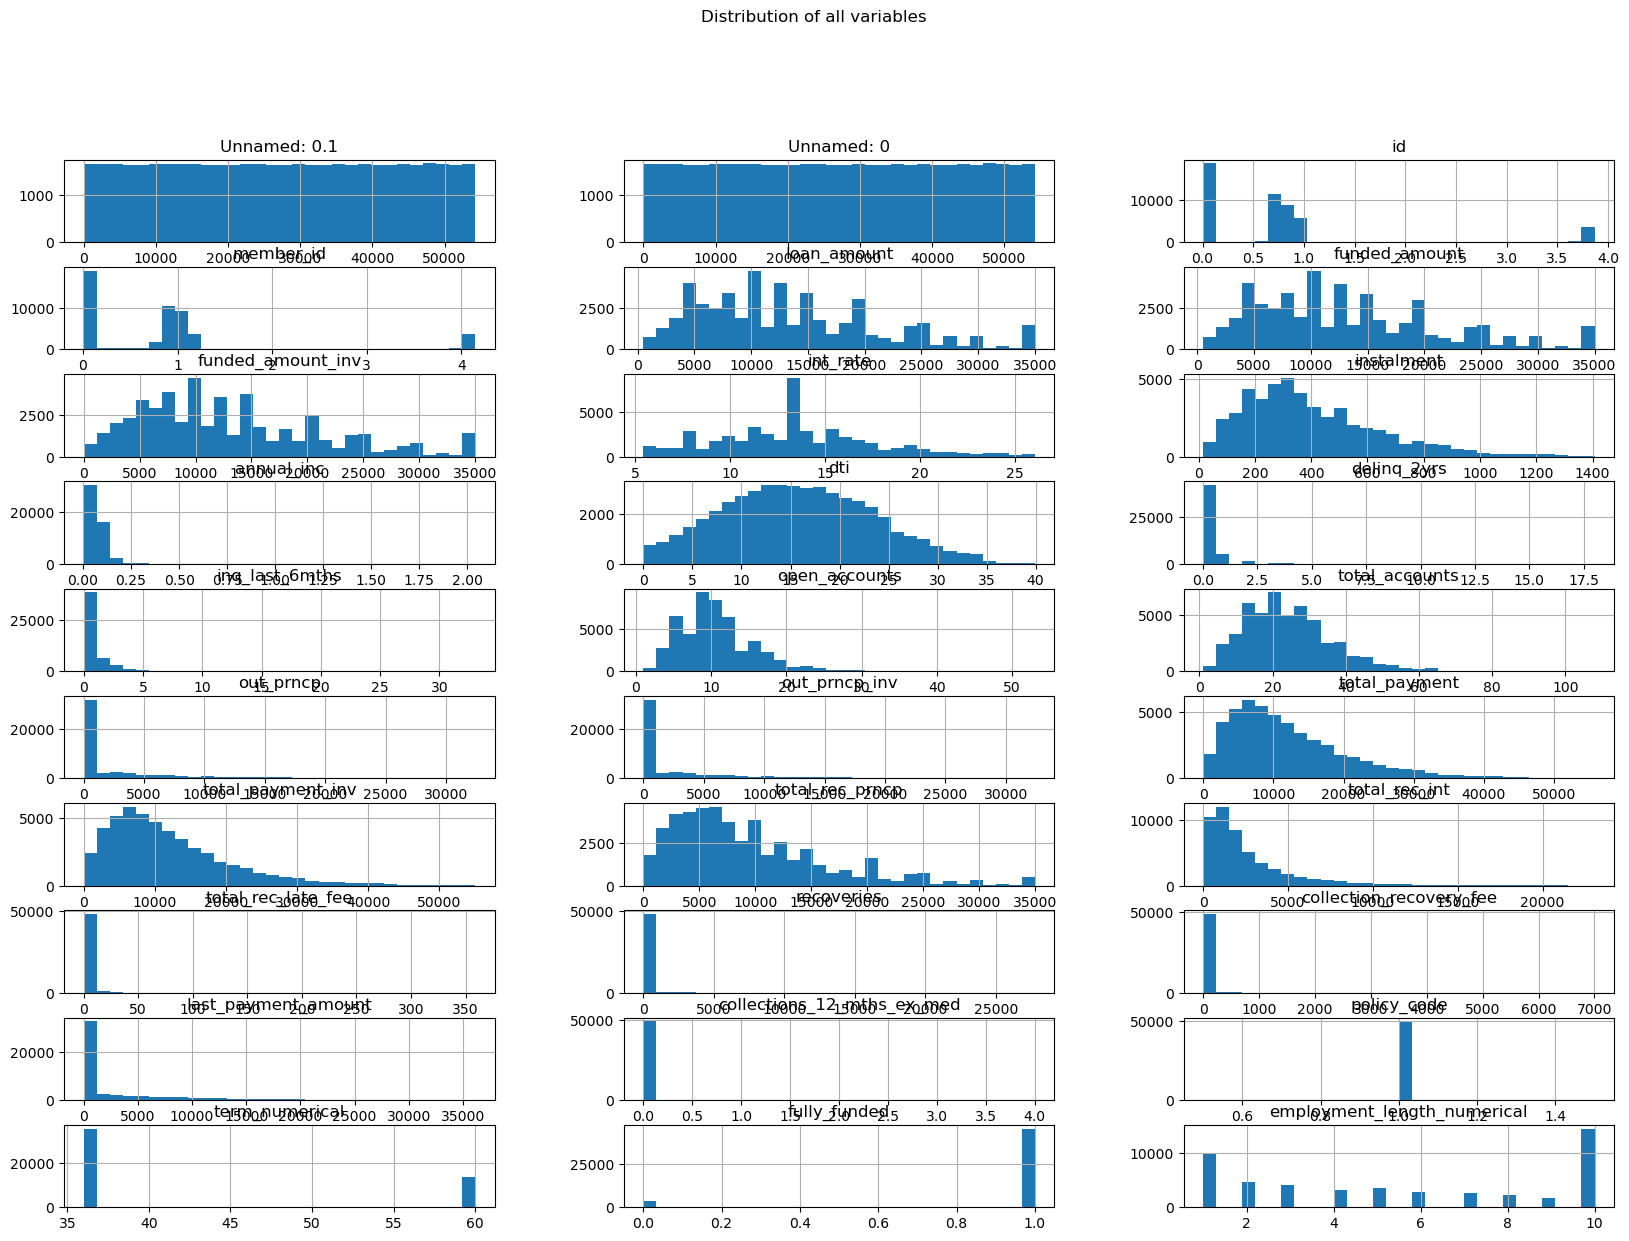

In [7]:
dfnum_plot.plot_distribution()

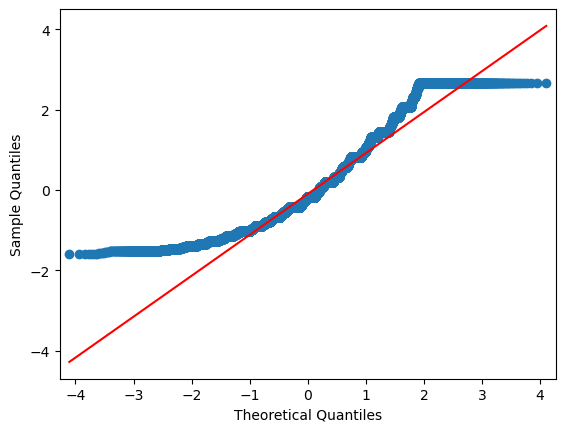

In [8]:
dfnum_plot.qqplot('loan_amount')

Let's use our DataTransform class to automatically apply one of the three following transformations that results in the most improved skew value:
- log transformation
- Box-Cox transformation
- Yeo-Johnsonn transformation

In [9]:
transform = dbu.DataTransform(dfnum)
dfnum = transform.run_all_transformations_and_select_best('annual_inc')
dfnum = transform.run_all_transformations_and_select_best('delinq_2yrs')
dfnum = transform.run_all_transformations_and_select_best('inq_last_6mths')
dfnum = transform.run_all_transformations_and_select_best('out_prncp')
dfnum = transform.run_all_transformations_and_select_best('out_prncp_inv')
dfnum = transform.run_all_transformations_and_select_best('total_rec_int')
dfnum = transform.run_all_transformations_and_select_best('total_rec_late_fee')
dfnum = transform.run_all_transformations_and_select_best('recoveries')
dfnum = transform.run_all_transformations_and_select_best('collection_recovery_fee')
dfnum = transform.run_all_transformations_and_select_best('last_payment_amount')
dfnum = transform.run_all_transformations_and_select_best('collections_12_mths_ex_med')

In [10]:
dfnum.skew()

Unnamed: 0.1                           0.000051
Unnamed: 0                             0.000051
id                                     2.362249
member_id                              2.198702
loan_amount                            0.803496
funded_amount                          0.819432
funded_amount_inv                      0.813451
int_rate                               0.454895
instalment                             0.994859
annual_inc                             8.552363
dti                                    0.191730
delinq_2yrs                            5.337343
inq_last_6mths                         3.010718
open_accounts                          1.055274
total_accounts                         0.774550
out_prncp                              2.358646
out_prncp_inv                          2.359055
total_payment                          1.270207
total_payment_inv                      1.259942
total_rec_prncp                        1.260454
total_rec_int                          2

Most of the skewed columns have had a tansformation applied that has improved their skewness.  
Let's now add back in the non-numerical data and save this new dataframe as a csv.

In [13]:
dfnonnum = df.select_dtypes(exclude=['number'])
print(dfnum.head())
print(dfnonnum.head())

   Unnamed: 0.1  Unnamed: 0        id  member_id  loan_amount  funded_amount  \
0             0           0  38676116   41461848         8000         8000.0   
1             1           1  38656203   41440010        13200        13200.0   
2             2           2  38656154   41439961        16000        16000.0   
3             3           3  38656128   41439934        15000        15000.0   
4             4           4  38656121   41439927        15000        15000.0   

   funded_amount_inv  int_rate  instalment  annual_inc  ...  \
0             8000.0      7.49      248.82     46000.0  ...   
1            13200.0      6.99      407.52     50000.0  ...   
2            16000.0      7.49      497.63     73913.0  ...   
3            15000.0     14.31      514.93     42000.0  ...   
4            15000.0      6.03      456.54    145000.0  ...   

   delinq_2yrs_box_cox  inq_last_6mths_yeo_j  out_prncp_box_cox  \
0              0.31601              0.520774          24.162361   
1     

In [16]:
df= pd.concat([dfnum, dfnonnum], axis=1)
df.head()
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,...,home_ownership,verification_status,issue_date,loan_status,payment_plan,purpose,earliest_credit_line,last_payment_date,last_credit_pull_date,application_type
0,38676116,41461848,8000,8000.0,8000.0,7.49,248.82,46000.0,19.54,2,...,MORTGAGE,Not Verified,2021-01-01,Current,n,credit_card,1987-10-01,2022-01-01,2022-01-01,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,6.99,407.52,50000.0,24.20,0,...,RENT,Not Verified,2021-01-01,Current,n,credit_card,2001-09-01,2022-01-01,2022-01-01,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,7.49,497.63,73913.0,16.92,0,...,MORTGAGE,Source Verified,2021-01-01,Fully Paid,n,credit_card,1998-09-01,2021-10-01,2021-10-01,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,14.31,514.93,42000.0,35.52,0,...,RENT,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,2008-06-01,2021-06-01,2021-06-01,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,6.03,456.54,145000.0,3.33,0,...,MORTGAGE,Verified,2021-01-01,Current,n,debt_consolidation,2002-04-01,2022-01-01,2022-01-01,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,76597,76583,5000,5000.0,1775.0,9.01,159.03,250000.0,10.00,2,...,MORTGAGE,Not Verified,2013-07-01,Fully Paid,n,other,2003-04-01,2016-07-01,2016-07-01,INDIVIDUAL
49455,142608,74724,5000,5000.0,2350.0,10.59,162.73,15000.0,24.40,0,...,RENT,Not Verified,2013-10-01,Fully Paid,n,other,1999-01-01,2016-10-01,2016-09-01,INDIVIDUAL
49456,117045,70978,3500,3500.0,2225.0,7.43,108.77,300000.0,1.00,0,...,MORTGAGE,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1984-02-01,2016-09-01,2013-05-01,INDIVIDUAL
49457,88854,70699,5000,5000.0,225.0,7.43,155.38,200000.0,0.28,0,...,RENT,Not Verified,2013-08-01,Fully Paid,n,house,1995-03-01,2014-03-01,2013-05-01,INDIVIDUAL


In [17]:
df.to_csv('loan_payments_more_normal.csv')